###  Credit Data 
In this R Lab assignment, we will use credit data set to identify whether a customer is risky or not in terms of repaying the loan. The dataset is in csv format, we read the data with read.csv command in R.   

Credit dataset includes the following variables:
- **creditability**:  Credit risk, Good (1), Bad (0)  (This is our target variable.)
- **balance**: No account: (1), None (No balance) (2), Some Balance (3), High Balance (4)
- **credit_duration**: Duration of credit in months
- **payment_status**: Payment Status of Previous Credit. Unknown (0), Some Problems (1), Paid Up (2), No Problems (in this bank) (3),  No Problems (in all banks) (4)
- **credit_amount**: current amount of credit from other accounts
- **wealth**: None (1),Below 100 (2), In between 100 and 999 (3), In between 1000 and 2000 (4), above 2000 (5)
- **employment_length**: Employment Length: Below 1 year (including unemployed) (1), one to four years (2), four to seven years (3), seven to ten years (4), more than ten years (5)
- **sex_marital**: Sex and marital status: Male Divorced/Single (1), Male Married/Widowed (2), Female  Married/Widowed  (3), Female Divorced/Single (4)
- **age**: Age in years




In [37]:
# call the libraries we will use in the lab assignment
library(tidyverse)
library(caret)
library(dplyr)
library(testthat)
# import the credit.csv data and name it as  creditdata in R. Data has the column names in the first row, so set header=TRUE
creditdata<-read.csv("credit.csv", header = TRUE, sep = ",")
# as can be seen with str(creditdata), some factor variables are coded as integer. 
# names of the columns that will need to be entered as factor data
columns<-c('creditability','balance','payment_status','wealth','employment_length','sex_marital')
# use the lapply function to selected columns to declare as factor
creditdata[,columns]<-lapply(creditdata[,columns], factor)

# check the data structure
str(creditdata)


'data.frame':	1000 obs. of  9 variables:
 $ creditability    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ balance          : Factor w/ 4 levels "1","2","3","4": 1 1 2 1 1 1 1 1 4 2 ...
 $ credit_duration  : int  18 9 12 12 12 10 8 6 18 24 ...
 $ payment_status   : Factor w/ 5 levels "0","1","2","3",..: 5 5 3 5 5 5 5 5 5 3 ...
 $ credit_amount    : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ wealth           : Factor w/ 5 levels "1","2","3","4",..: 1 1 2 1 1 1 1 1 1 3 ...
 $ employment_length: Factor w/ 5 levels "1","2","3","4",..: 2 3 4 3 3 2 4 2 1 1 ...
 $ sex_marital      : Factor w/ 4 levels "1","2","3","4": 2 3 2 3 3 3 3 3 2 2 ...
 $ age              : int  21 36 23 39 38 48 39 40 65 23 ...


In [38]:
# First we split the data into training and test sets by using the caret package
# Training set contaings 75% of the data while test test has the remaining 
# In cases where the fractional split does not give a whole number, you have the set your list function in createDataPartition function in caret package


set.seed(4230) # for reproducibility
index_row <- createDataPartition(creditdata$creditability , p = 0.75,
list = FALSE)   # get the row indices to be used for the training set

train_credit <- creditdata[index_row, ]  # training data
test_credit <- creditdata[-index_row, ]   #test data

str(creditdata)

'data.frame':	1000 obs. of  9 variables:
 $ creditability    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ balance          : Factor w/ 4 levels "1","2","3","4": 1 1 2 1 1 1 1 1 4 2 ...
 $ credit_duration  : int  18 9 12 12 12 10 8 6 18 24 ...
 $ payment_status   : Factor w/ 5 levels "0","1","2","3",..: 5 5 3 5 5 5 5 5 5 3 ...
 $ credit_amount    : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ wealth           : Factor w/ 5 levels "1","2","3","4",..: 1 1 2 1 1 1 1 1 1 3 ...
 $ employment_length: Factor w/ 5 levels "1","2","3","4",..: 2 3 4 3 3 2 4 2 1 1 ...
 $ sex_marital      : Factor w/ 4 levels "1","2","3","4": 2 3 2 3 3 3 3 3 2 2 ...
 $ age              : int  21 36 23 39 38 48 39 40 65 23 ...


## Logistic Regression without cross-validation  glm () function


In logistic regression, the linear combinations of predictors will give us the log of odds rotio. 
$$ g(p) = \log \frac{p}{1-p}$$. Odds ratio  tells us how much more likely something will happen compared to not happening. 

We will first look at the logistic regression results without cross-validation. In the next section, we will get the results with cross validation. 

We will work on the following three models:
- **Model1**:  Predictor: **age**
- **Model2**:  Predictors: **age**, **credit_amount** , **credit_duration**  
- **Model3**:  Predictors: all of them  (balance,credit_duration, payment_status,credit_amount,wealth, employment_length, sex_marital, age)

As shown below, probability of an event will be less than 0.5 when log odds ratio is negative. Likewise, in cases where log odds ratio is positive, the probability becomes higher than 0.5. 


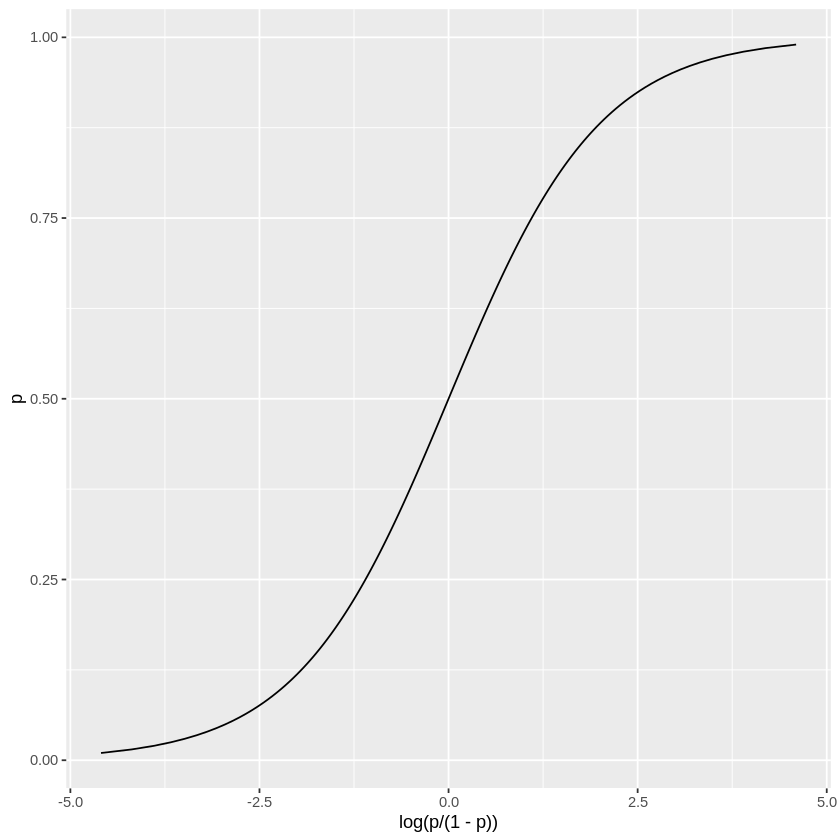

In [39]:
  # logit vs probability
p <- seq(0.01,.99,len=200)
qplot(log( p/(1-p) ),p,  geom="line")

# Exercise 1: 

- By using *train_credit* data, use glm() function in R to estimate Model1 and call your model as **model1**
- By using *train_credit* data, use glm() function in R to estimate Model2 and call your model as **model2**
- By using *train_credit* data, use glm() function in R to estimate Model3 and call your model as **model3**


In [5]:
# Exercise #1: 
#By using train_credit data, use glm() function to estimate Model1 and call your model as model1
#By using train_credit data, use glm() function to estimate Model2 and call your model as model2
#By using train_credit data, use glm() function to estimate Model3 and call your model as model3

set.seed(4230)
model1 <- glm(creditability ~ age,  family = "binomial", data = train_credit)
model2 <- glm(f, family = "binomial", data = train_credit)
model3 <- glm(creditability ~ (.), family = "binomial", data = train_credit)
# your code here



summary(model1)
summary(model2)
summary(model3)


Call:
glm(formula = creditability ~ age, family = "binomial", data = train_credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0032  -1.4040   0.7789   0.8862   1.0144  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.214581   0.279993  -0.766  0.44345    
age          0.030539   0.007898   3.867  0.00011 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 916.30  on 749  degrees of freedom
Residual deviance: 899.98  on 748  degrees of freedom
AIC: 903.98

Number of Fisher Scoring iterations: 4



Call:
glm(formula = creditability ~ (age + credit_amount + credit_duration), 
    family = "binomial", data = train_credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0615  -1.2223   0.7007   0.8605   1.6237  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      5.165e-01  3.195e-01   1.617 0.105921    
age              3.216e-02  8.224e-03   3.910 9.24e-05 ***
credit_amount   -3.918e-05  3.559e-05  -1.101 0.270971    
credit_duration -3.002e-02  8.572e-03  -3.502 0.000462 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 916.30  on 749  degrees of freedom
Residual deviance: 868.28  on 746  degrees of freedom
AIC: 876.28

Number of Fisher Scoring iterations: 4



Call:
glm(formula = creditability ~ (.), family = "binomial", data = train_credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5918  -0.9060   0.4563   0.7743   1.9286  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.074e+00  8.316e-01  -1.292  0.19641    
balance2            4.518e-01  2.262e-01   1.997  0.04580 *  
balance3            9.373e-01  3.969e-01   2.362  0.01820 *  
balance4            1.732e+00  2.490e-01   6.958 3.46e-12 ***
credit_duration    -3.162e-02  9.402e-03  -3.363  0.00077 ***
payment_status1    -4.058e-01  5.904e-01  -0.687  0.49191    
payment_status2     7.331e-01  4.687e-01   1.564  0.11779    
payment_status3     7.562e-01  5.406e-01   1.399  0.16189    
payment_status4     1.200e+00  4.943e-01   2.428  0.01519 *  
credit_amount      -5.024e-05  3.971e-05  -1.265  0.20585    
wealth2             4.406e-02  2.941e-01   0.150  0.88090    
wealth3             3.655e-01  4.645e-01   

In [40]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check number of dimensions", {
    expect_equal( summary(model1)[5][[1]],903.983962332741)})
          
          
test_that("Check number of dimensions", {
    expect_equal( summary(model2)[5][[1]],876.276062513887)})

test_that("Check number of dimensions", {
    expect_equal( summary(model3)[5][[1]],790.094608058906)})
print("Passed!")

### END HIDDEN TEST

[1] "Passed!"


## Exercise 2:

Given that our target variable is a binary indicator, we can calculate the logit numbers (natural logarithm of the odds ratio) from the logistic regression output. 
- Based on **model1**, calculate the logit valus in **train_credit** data and call it **model1_logit**. 
- Based on **model2**, calculate the logit valus in **train_credit** data and call it **model2_logit**. 
- Based on **model3**, calculate the logit valus in **train_credit** data and call it **model3_logit**. 

In [7]:
names(train_credit)

[1] "creditability"     "balance"           "credit_duration"  
[4] "payment_status"    "credit_amount"     "wealth"           
[7] "employment_length" "sex_marital"       "age"

In [8]:
# Exercise #2: 

# Based on **model1**, calculate the logit valus in **train_credit** data and call it **model1_logit**. 
# Based on **model2**, calculate the logit valus in **train_credit** data and call it **model2_logit**. 
# Based on **model3**, calculate the logit valus in **train_credit** data and call it **model3_logit**. 

set.seed(4230)

# your code here
model1_logit = predict(model1, type = "link")
model2_logit = predict(model2, type = "link")
model3_logit = predict(model3, type = "link")

sum(model1_logit)
sum(model2_logit)
sum(model3_logit)

[1] 654.0158

[1] 680.7102

[1] 825.4176

In [9]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the accuracy of logit numbers", {
    expect_equal( sum(model1_logit),654.015847229984)})

test_that("Check the accuracy of logit numbers", {
    expect_equal( sum(model2_logit),680.710224711692)})

test_that("Check the accuracy of logit numbers", {
    expect_equal( sum(model3_logit),825.41761904404)})

print("Passed!")

### END HIDDEN TEST

[1] "Passed!"


## Exercise 3:

Now, it is time to calculate the probability that a customer, given the predictors, has GOOD credit risk (creditability takes the value of 1) from the logistic regression results of model1, model1 and model3. 

-  Calculate the probabilities of  good credit risk for the customers in **train_credit** data based on **model1** and call it **model1_prob**

-  Calculate the probabilities of  good credit risk for the customers in **train_credit** data based on **model2** and call it **model2_prob**

-  Calculate the probabilities of  good credit risk for the customers in **train_credit** data based on **model3** and call it **model3_prob**




In [24]:
# Exercise #3: 

#  Calculate the probabilities of  good credit risk for the customers in **train_credit** data based on **model1** and call it **model1_prob**

#  Calculate the probabilities of  good credit risk for the customers in **train_credit** data based on **model2** and call it **model2_prob**

#  Calculate the probabilities of  good credit risk for the customers in **train_credit** data based on **model3** and call it **model3_prob**

set.seed(4230)

# your code here

model1_prob <- predict(model1, type = "response")
model2_prob <- predict(model2, type = "response")
model3_prob <- predict(model3, type = "response")
print(model1_prob)
print(model2_prob)
print(model3_prob)

        1         3         5         6         7         8         9        10 
0.6050922 0.6195893 0.7202866 0.7775195 0.7263977 0.7324249 0.8545104 0.6195893 
       11        12        13        14        16        17        19        20 
0.7078173 0.6267605 0.6752690 0.6752690 0.7556755 0.7324249 0.7078173 0.7263977 
       21        22        24        26        27        29        30        32 
0.7140927 0.7827573 0.6409342 0.7929639 0.6267605 0.6617353 0.8169139 0.7140927 
       33        35        36        38        39        40        41        43 
0.6950274 0.7078173 0.7263977 0.6409342 0.6752690 0.7383672 0.6195893 0.7078173 
       44        45        46        47        48        49        50        52 
0.6950274 0.8386571 0.6195893 0.6338763 0.6685370 0.6885161 0.6409342 0.6195893 
       53        54        55        56        57        58        59        60 
0.6685370 0.7827573 0.7383672 0.8258728 0.8467516 0.6479316 0.7383672 0.7078173 
       61        62        6

In [25]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the accuracy of calculated probabilities", {
    expect_equal( model1_prob[[1]],0.605092184658176)})

test_that("Check the accuracy of calculated probabilities", {
    expect_equal( model2_prob[[33]],0.685393567269547)})

test_that("Check the accuracy of calculated probabilities", {
    expect_equal( model3_prob[[10]],0.544743221429791)})

print("Passed!")

### END HIDDEN TEST

[1] "Passed!"


In [31]:
##  Now, we will label train data based on model1 results. 
# We will predict the **creditability** values in **train_credit** dataset by using the threshold level of 0.65.  
#If the predicted probability takes the value higher than  0.65, we will label that customer as GOOD credit risk (creditability=1) and vice versa.

model1_predict<-rep(0, nrow(train_credit))  # create  a matrix and assign everyone as 0 (Bad credit)
model1_predict[model1_prob>0.65]= 1     # if the predicted probability is higher than 0.65,  label them as 1
table(model1_predict,train_credit$creditability)  # create the confusion matrix. 



              
model1_predict   0   1
             0  80 125
             1 145 400

## Exercise  4

Now,  your turn!  
- By using **model2**, predict the **creditability** values in **train_credit** dataset by using the threshold level of 0.65 and name it **model2_predict**

- By using **model3**, predict the **creditability** values in **train_credit** dataset by using the threshold level of 0.65 and name it **model3_predict**


In [28]:
# Exercise #4: 

# By using **model2**, predict the **creditability** values in **train_credit** dataset by using the threshold level of 0.65 and name it **model2_predict**

# By using **model3**, predict the **creditability** values in **train_credit** dataset by using the threshold level of 0.65 and name it **model3_predict**

set.seed(4230)

# your code here
model2_predict <-rep (0, nrow(train_credit))  # create  a matrix and assign everyone as 0 (Bad credit)
model2_predict[model2_prob>0.65]= 1     # if the predicted probability is higher than 0.65,  label them as 1
table(model2_predict,train_credit$creditability)

model3_predict <-rep (0, nrow(train_credit))  # create  a matrix and assign everyone as 0 (Bad credit)
model3_predict[model3_prob>0.65]= 1     # if the predicted probability is higher than 0.65,  label them as 1
table(model3_predict,train_credit$creditability)

              
model2_predict   0   1
             0  87 116
             1 138 409

              
model3_predict   0   1
             0 151 124
             1  74 401

In [29]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the accuracy of predicted labels", {
    expect_equal(sum(model2_predict),547)})

test_that("Check the accuracy of predicted labels", {
    expect_equal(sum(model3_predict),475)})

print("Passed!")

### END HIDDEN TEST

[1] "Passed!"


## Training Error Calculation 

In [32]:
#  Now we can calculate the classification error rate. 

# create a function that will calculate the classification error
class_error = function(true, predicted) {
  mean(true != predicted)
}

print("Based on model1, the classification error is:")
class_error (train_credit$creditability,model1_predict)

print("Based on model2, the classification error is:")
class_error (train_credit$creditability,model2_predict)


print("Based on model3, the classification error is:")
class_error (train_credit$creditability,model3_predict)





[1] "Based on model1, the classification error is:"


[1] 0.36

[1] "Based on model2, the classification error is:"


[1] 0.3386667

[1] "Based on model3, the classification error is:"


[1] 0.264

## Exercise 5: 
According the the findings above, it looks like **model3** is doing a good job with the lowest classification error.  However, this finding (training error) can be misleading as we trained and tested the model on the same dataset. Training error can be overly optimistic. A more complex model, i.e **model3***, can perform relatively better than a simpler model in the training data. Hence, to better assess the performance of each model, we need to test them on an untouched (held out) data.  By this way, we get a better estimate of error rate of each model. 

-  Use **model1** to calculate the  probabilities of  good credit risk for the customers in **test_credit** dataset and name it **model1_test_prob**

-  Use **model2** to calculate the  probabilities of  good credit risk for the customers in **test_credit** dataset and name it **model2_test_prob**

-  Use **model3** to calculate the  probabilities of  good credit risk for the customers in **test_credit** dataset and name it **model3_test_prob**


 



In [34]:
# Exercise #5: 

#  Use **model1** to calculate the  probabilities of  good credit risk for the customers in **test_credit** dataset and name it **model1_test_prob**

#  Use **model2** to calculate the  probabilities of  good credit risk for the customers in **test_credit** dataset and name it **model2_test_prob**

#  Use **model3** to calculate the  probabilities of  good credit risk for the customers in **test_credit** dataset and name it **model3_test_prob**


set.seed(4230)

# your code here
model1_test_prob<- predict(model1, test_credit, type="response")
model2_test_prob<- predict(model2, test_credit, type="response")
model3_test_prob<- predict(model3, test_credit, type="response")

print(model1_test_prob)
print(model2_test_prob)
print(model3_test_prob)

        2         4        15        18        23        25        28        31 
0.7078173 0.7263977 0.6195893 0.6338763 0.6885161 0.7556755 0.7140927 0.7721921 
       34        37        42        51        63        66        67        68 
0.6548661 0.7202866 0.8258728 0.7827573 0.7721921 0.6479316 0.7979327 0.6548661 
       71        76        77        81        87        90        94        97 
0.6819293 0.6267605 0.7078173 0.7140927 0.7014617 0.7442236 0.8302208 0.6195893 
      101       110       111       113       114       115       117       119 
0.7324249 0.8386571 0.6617353 0.7078173 0.6409342 0.7014617 0.7014617 0.7979327 
      121       125       129       132       135       146       147       148 
0.6685370 0.7721921 0.6685370 0.7499933 0.8506726 0.7667754 0.7827573 0.7827573 
      151       154       160       167       172       173       183       192 
0.7442236 0.7202866 0.6548661 0.6338763 0.6267605 0.6195893 0.6338763 0.6479316 
      197       198       20

In [35]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the accuracy of predicted labels", {
    expect_equal(max(model1_test_prob),0.885468929293488 )})



test_that("Check the accuracy of predicted labels", {
    expect_equal(max(model2_test_prob),0.918705505426811 )})


test_that("Check the accuracy of predicted labels", {
    expect_equal(max(model3_test_prob),0.980328014442461 )})


print("Passed!")

### END HIDDEN TEST

[1] "Passed!"


In [36]:
classification <-function (true, predict,th) {
    label<-rep(0, nrow(true))  # create  a matrix and assign everyone as 0 (Bad credit)
    label[predict>th]= 1     # if the predicted probability is higher than th=0.65,  label them as 1
    class_error(true$creditability,label)  # calculate the classification error  
}

print("classification error in test data based on model 1")
classification(test_credit,model1_test_prob,0.65)  #classification error in test data based on model 1


print("classification error in test data based on model 2")
classification(test_credit,model2_test_prob,0.65)  #classification error in test data based on model 1

print("classification error in test data based on model 3")
classification(test_credit,model3_test_prob,0.65)  #classification error in test data based on model 1


[1] "classification error in test data based on model 1"


[1] 0.42

[1] "classification error in test data based on model 2"


[1] 0.384

[1] "classification error in test data based on model 3"


[1] 0.268

In [ ]:
# model 3 is the best model from train/test data